# Lab 4: Building an Image Classifier from Scratch

The main goal of this lab is to create an image classifier from scratch using the Keras package. You will create a binary classifier based on an object type of your choice. The classifier will accept images and then predict whether or not a given image contains that object. For example, if you chose your object to be a cat, then the classifier would accept images and predict 1 if it believes there is a cat in the image or a 0 if not. 

You will build and train a classifier in two ways: 
- first using the original data set that you create, and 
- second, using data augmentation techniques. 

**Grading:** 
**Grading:** 

 - 50% of the grade will come from FINAL, error-free code written in Python/Keras that accomplishes all the steps outlined in the instructions for each part of this lab and written in Python/Keras 
 - 50% will come from descriptive comments associated with that code, where the comments explain what the code is doing and why it is important to the overall objective. Thus, comments like "split the data" or "train the model" would receive a grade of 0 as they do not indicate any understanding.

**Research Required:** 

To complete this lab successfully you will need to do some research. At the very least, you will need to implement the [`ImageDataGenerator` class](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) and the [`.flow_from_directory` method](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_directory). 

**What to submit:**
- A copy of this notebook with:
    - Error-free code in Python/Keras
    - All code cells executed and output visible
- Include a zipped file of your images



## Part 1: Prep Work
### Choose an Object

**You may choose any object other than a cat**.

### Create a Dataset
Use the code provided below to:
 - download a minimum of 500 **useable** images of the chosen object
 - download a minimum of 500 **useable** images of other things that are not your object; there should be **at least 10 different types of objects** in this group of images
 
You should manually verify that the images are indeed of the correct object; that is, sometimes the code will download images that are not of the desired search term and should be deleted. 
 
From these images you will create a training folder (minimum of 350 object/350 not object), a validation folder (minimum of 50 object/50 not object), and a test folder (minimum of 100 object/100 not object). The final counts should approximately represent a 70%/10%/20% split. **Code to create the training, validation, and test folders should be included.**

It's best if your dataset is diverse, so verify that the images of the chosen object have, for example, different lighting, are from different angles, different distances from camera. Similarly for the *not object* images: try to include a variety of objects in different ways. 

**The images downloaded should not be used for any purpose other than personal academic use unless noted otherwise by the copyright holder of the image.**

### Group#: 08  

|Name | Student ID | 
|:-:|:-:|
|Rohit Rohit  |  0773987|
|Rakesh Singh  | 0775942 |
|Praveen Thudianplackal Jose  | 0779521 |
|Reshma Thomas  | 0779853 |

#### Code for image download

Use the code cells below to download the required images. Note that you will most likely need to request more images than the required amount as some images will not be useable. 

In [ ]:
# modified version of code at https://python.plainenglish.io/how-to-automatically-download-bulk-images-for-your-dataset-using-python-f1efffba7a03
import os
import requests
import pathlib
from bs4 import BeautifulSoup

In [ ]:
google_image = "https://www.google.com/search?site=&tbm=isch&source=hp&biw=1873&bih=990&"

user_agent = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.77 Safari/537.36"
}

In [ ]:
def download_images():
    data = input('What are you looking for? ')
    n_images = int(input('How many images do you want? '))

    print(f'\nSearching for {n_images}...\n')

    search_url = google_image + 'q=' + data

    response = requests.get(search_url, headers=user_agent)
    html = response.text

    soup = BeautifulSoup(html, 'html.parser')
    results = soup.findAll('img', {'class': 'rg_i Q4LuWd'})

    count = 1
    links = []
    
    for result in results:
        try:
            link = result['data-src']
            links.append(link)
            count += 1
            if(count > n_images):
                break

        except KeyError:
            continue
            
    print(f"Found {len(links)} images.\n")
    print(f"Downloading {len(links)} images...\n")

    curr_path = pathlib.Path()
    saved_folder = curr_path / 'images' / data

    pathlib.Path(saved_folder).mkdir(parents=True, exist_ok=True)

    for i, link in enumerate(links):
        response = requests.get(link)
        filename = data + str(i+1) + '.jpg'
        image_name = saved_folder / filename

        with open(image_name, 'wb') as fh:
            fh.write(response.content)
    
    print(f"Finished downloading!")


In [ ]:
download_images()

In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import  Conv2D,MaxPooling2D,BatchNormalization,Dense,Flatten,Dropout
from tensorflow.keras.models import  Sequential
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.losses import  SparseCategoricalCrossentropy

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

from pathlib import Path
path = Path().cwd()
q = path/'drive'/'MyDrive'/'Colab Notebooks'/'Lab_4'
print(q)

import pandas as pd
from google.colab import drive

drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/Lab_4
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Part 2: Using the Original Data

### Dataset Verification

You should verify that the training, validation, and test sets have the correct number of images (the `os` functions should help with this) and that the data is organized in `train`, `validation`, and `test` folders. 


In [ ]:
#Here, we have used the OS Library to get the number of images in test, train and validation.

#The total image count is around 1000, out of it 500 is for horse image and rest 500 is for non horse images. 

#Again out of this 500 images, 70% we have used for training, 10% for validation and 20% for testing purpose.

#So, by using below code we have verified the test, train and validation have correct number of images as expected.


df = os.listdir('/content/drive/MyDrive/Colab Notebooks/lab_4/train/Horse') # directory path
number_files = len(df)
print(f' Train Horse :{number_files}')
df = os.listdir('/content/drive/MyDrive/Colab Notebooks/lab_4/test/Horse') # directory path
number_files = len(df)
print(f' Test Horse :{number_files}')
df = os.listdir('/content/drive/MyDrive/Colab Notebooks/lab_4/validation/Horse') # directory path
number_files = len(df)
print(f' Validation Horse :{number_files}')
df = os.listdir('/content/drive/MyDrive/Colab Notebooks/lab_4/train/no horse') # directory path
number_files = len(df)
print(f' Train no horse :{number_files}')
df = os.listdir('/content/drive/MyDrive/Colab Notebooks/lab_4/test/no horse') # directory path
number_files = len(df)
print(f' Test  no horse :{number_files}')
df = os.listdir('/content/drive/MyDrive/Colab Notebooks/lab_4/validation/no horse') # directory path
number_files = len(df)
print(f' Validation no horse :{number_files}')

 Train Horse :350
 Test Horse :100
 Validation Horse :50
 Train no horse :350
 Test  no horse :100
 Validation no horse :50


### Dataset Loading and Processing with Image Data Generators

You should now create image data generators for your training, validation, and test datasets that will allow you to feed them into your model in batches. The images should be resized to 180x180 pixels and scaled so all pixel values are between 0 and 1

In [ ]:
#Use of Image data generator and flow from directory
#We're utilising the image data generator to create tensor images in batches.

#Flow from directory aids in directing the route to the directory as well as assisting in the creation of batches for the 
#specified data.


#in the blow code we are scaling the pixel value by dividing 255 so that the value are in the range of 0 to 1.
train_df = ImageDataGenerator(rescale=1./255)
test_df = ImageDataGenerator(rescale=1./255)
validation_df = ImageDataGenerator(rescale=1./255)

# The below code is used to get the image in two category "horse" and "not horse" from the directory folder train.
# Target size is use for setting all image size as same, here we are used 180*180 as target size.
# Batch size = 32 will help to maintain 32 number of images in the each batch.
# We used binary as class mode it is because we  are doing Binary classification.

tr_g = train_df.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/lab_4/train',
        (180, 180),
        batch_size=32,
        class_mode ='binary'
        )

# The below code is used to get the image in two category "horse" and "not horse" from the directory folder validation.
# Target size is use for setting all image size as same, here we are used 180*180 as target size.
# Batch size = 32 will help to maintain 32 number of images in the each batch.
# We used binary as class mode it is because we  are doing Binary classification.

val_g = validation_df.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/lab_4/validation',
        (180, 180),
        batch_size=32,
        class_mode='binary'
        )
# The below code is used to get the image in two category "horse" and "not horse" from the directory folder test.
# Target size is use for setting all image size as same, here we are used 180*180 as target size.
# Batch size = 32 will help to maintain 32 number of images in the each batch.
# We used binary as class mode it is because we  are doing Binary classification.

te_g = test_df.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/lab_4/test',
        (180, 180),
        batch_size=32,
        class_mode='binary'
        )

Found 700 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


### Create and Evaluate a Model

Build a convolutional neural network and use the validation loss and accuracy to select the best architecture and hyperparameters so that you can maximize the validation accuracy. 

Any overfitting should be addressed; that is, if your model begins overfitting after epoch 3, you should not quote validation accuracy after epoch 15. And, appropriate attempts should be made to reduce/eliminate the overfitting to improve overall model generalizability. 

In [ ]:
#The step we followed to create and evaluate the model
#The sequencial model we have created using the convolution layers as well as the fully connected layers.

#The number of convolution layers have used here is 9.

#The same and valid padding options have used for giving more space for the filter to handle in the images.

#Also the activation function here we have used is relu and sigmoid.

#Here the dropout layer is helping to restrict the overfitting. It is usually using after the convolutional layer and the maxpooling
#we are using maxpooling function to decrease our paramter which also prevents our model from overfitting.
#Pooling will reduce overfitting and it also decrease our parameter.

#The dense is used for creating the fully connected layers.

#The amount by which the window shifts in each dimension is determined by strides.  Here we have used strides value 1 and 2.

#While doing the model compailing, we have used optimizer as 'adam', loss as 'SparseCategoricalCrossentropy' and 
#the metrics for evaluation is choosed as 'accuracy'.

#flatten function we are used for converting our data matrics to an 1D array for inputtig to our fully connected network.

#Lastly, we have fitted the model with the epochs value of 20.

cnn_model = Sequential([
                    Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu', input_shape = (180,180,3)),
                    Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu'),
                    MaxPooling2D((2,2)),
                    BatchNormalization(),
                    Dropout(0.2),
                    Conv2D(filters = 32, kernel_size = (4,4), padding = 'same', activation = 'relu'),
                    #Dropout(0.2),
                    Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu'),
                    MaxPooling2D((2,2)),
                    Conv2D(filters = 64, kernel_size = (4,4), padding = 'valid', activation  = 'relu' ),
                    MaxPooling2D(pool_size = (3,3), strides = 1),
                    Conv2D(filters = 64, kernel_size = (3,3), padding = 'valid', activation  = 'relu' ),
                    MaxPooling2D(pool_size = (2,2), strides = 2),
                    # Dropout(0.2), #last
                    Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation  = 'relu' ),
                    MaxPooling2D(pool_size = (2,2), strides = 2),
                    BatchNormalization(),
                    Dropout(0.3),
                    Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation  = 'relu' ),
                    Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation  = 'relu' ),
                    MaxPooling2D(pool_size = (2,2), strides = 1),
                    BatchNormalization(),
                    Flatten(),
                    Dense(128, activation='relu'),
                    Dropout(0.2),
                    BatchNormalization(),
                    Dense(2, activation='sigmoid')
                    ])
                    
cnn_model.summary()

cnn_model.compile(optimizer='adam', 
              loss=SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'] )

cnn_model.fit(tr_g, epochs=20, validation_data=val_g)
                  

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 conv2d_28 (Conv2D)          (None, 180, 180, 32)      9248      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 90, 90, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_12 (Bat  (None, 90, 90, 32)       128       
 chNormalization)                                                
                                                                 
 dropout_9 (Dropout)         (None, 90, 90, 32)        0         
                                                                 
 conv2d_29 (Conv2D)          (None, 90, 90, 32)       

### Report Accuracy on Test Set 

Your final step is to make predictions using the test set and report the final test set accuracy.

In [ ]:
#This below code is used for finding the test accuracy
test_acc = cnn_model.evaluate(te_g)
print('test_acc:', test_acc)

7/7 [==============================] - 1s 102ms/step - loss: 0.9792 - accuracy: 0.6150
test_acc: [0.9791820645332336, 0.6150000095367432]


## Part 3: Using Data Augmentation  


### Dataset Loading and Processing with Create Image Data Generators

You should now create image data generators for your training, validation, and test datasets that will allow you to feed them into your model in batches. The images should be resized to 148x148 pixels and scaled so all pixel values are between 0 and 1. 

In [ ]:
# Below code chunk is used to augment the train image as required for the lab. In this code chunk we have given the horizontal and vertical shift to the image.
# Rotation is kept at 60 degrees for all the images.
# anytype of flips are kept as false which restricts the flip of the images.
# All the images are rescaled to 0 and 1.

augment_data= ImageDataGenerator(samplewise_center=True,
                                 featurewise_std_normalization=False,
                                 samplewise_std_normalization=False,
                                 zca_whitening=False,
                                 rotation_range=60,
                                 width_shift_range=0.3,
                                 height_shift_range=0.3,
                                 brightness_range=None,
                                 shear_range=0.0,
                                 zoom_range=0.0,
                                 channel_shift_range=0.0,
                                 fill_mode='nearest',
                                 cval=0.0,
                                 horizontal_flip=False,
                                 vertical_flip=False,
                                 rescale=1/255.,
                                 preprocessing_function=None,
                                 data_format=None)

In [ ]:
# below code is used to import training data using flow_from_directory.
tr_aug = train_df.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/lab_4/train',
        (148, 148), # All the images are rescaled to 148x148 to have a uniformity among all the images.
        batch_size=32, #This will pass batch of 32 at a time as passing all the images at a time will make the process very slow.
        class_mode ='binary' # Class mode is kept as binary as our output will be either yes or no. 
        )

# below code is used to import validation data using flow_from_directory.
val_aug = validation_df.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/lab_4/validation',
        (148, 148),
        batch_size=32,
        class_mode='binary'
        )

# below code is used to import test data using flow_from_directory.
te_aug = test_df.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/lab_4/test',
        (148, 148),
        batch_size=32,
        class_mode='binary'
        )

Found 700 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


### Add Data Augmentation 

You should now add data augmentation to your training data generator ONLY. All useful types of augmentation should be used.

In [ ]:
# Since we only have to augment train data, we have used the augment data function only with the training data.
tr_aug_data = augment_data.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/lab_4/train',
        (148, 148),
        batch_size=32,
        class_mode ='binary'
        )


Found 700 images belonging to 2 classes.


### Create and Evaluate a Baseline Model

Use the best model from **Part 2** to train with the augmented data and evaluate on the validation data to get a baseline accuracy for the new model trained on the augmented dataset.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


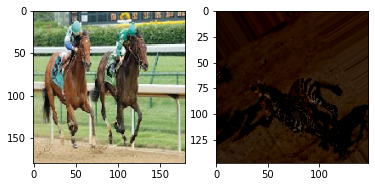

In [ ]:
import matplotlib.pyplot as plt
plt.subplot(1,3,1)
for (x,y),(x1,y1) in zip(tr_g,tr_aug_data):
    plt.subplot(1,2,1)
    plt.imshow(x[0])
    plt.subplot(1,2,2)
    plt.imshow(x1[0])
    break

In [ ]:
# The model from part 2 is used with the data from part 3. Only difference here is the input shape because the input shape in part 3 has to be 148x148 based on the requirement

cnn_aug_model = Sequential([
                    Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu', input_shape = (148,148,3)),
                    Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu'),
                    MaxPooling2D((2,2)),
                    BatchNormalization(),
                    Dropout(0.2),
                    Conv2D(filters = 32, kernel_size = (4,4), padding = 'same', activation = 'relu'),
                    #Dropout(0.2),
                    Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu'),
                    MaxPooling2D((2,2)),
                    Conv2D(filters = 64, kernel_size = (4,4), padding = 'valid', activation  = 'relu' ),
                    MaxPooling2D(pool_size = (3,3), strides = 1),
                    Conv2D(filters = 64, kernel_size = (3,3), padding = 'valid', activation  = 'relu' ),
                    MaxPooling2D(pool_size = (2,2), strides = 2),
                    # Dropout(0.2), #last
                    Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation  = 'relu' ),
                    MaxPooling2D(pool_size = (2,2), strides = 2),
                    BatchNormalization(),
                    Dropout(0.3),
                    Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation  = 'relu' ),
                    Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation  = 'relu' ),
                    MaxPooling2D(pool_size = (2,2), strides = 1),
                    BatchNormalization(),
                    Flatten(),
                    Dense(128, activation='relu'),
                    Dropout(0.2),
                    BatchNormalization(),
                    Dense(2, activation='sigmoid')
                    ])
                    
cnn_aug_model.summary()

cnn_aug_model.compile(optimizer='adam', 
              loss=SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'] )

cnn_aug_model.fit(tr_aug_data, epochs=20, validation_data=val_aug)
                  

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 conv2d_37 (Conv2D)          (None, 148, 148, 32)      9248      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_16 (Bat  (None, 74, 74, 32)       128       
 chNormalization)                                                
                                                                 
 dropout_12 (Dropout)        (None, 74, 74, 32)        0         
                                                                 
 conv2d_38 (Conv2D)          (None, 74, 74, 32)       

### Tune the Model

With a more complex training set, you may be able to improve the accuracy through adjustments to the baseline model architecture and tuning the hyperparameters.

In [61]:
# The above model is tuned by adding and removing Convulation layer, Dropout and MaxPooling2D to improve the accuracy of the baseline modal for the augmented images.

tune_cnn_aug = Sequential([
                    Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu', input_shape = (148,148,3)),
                    Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu'),
                    MaxPooling2D((2,2)),
                    BatchNormalization(),
                    Dropout(0.2),
                    Conv2D(filters = 32, kernel_size = (4,4), padding = 'same', activation = 'relu'),
                    Dropout(0.2),
                    Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu'),
                    MaxPooling2D((2,2)),
                    Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation  = 'relu' ),
                    MaxPooling2D(pool_size = (2,2), strides = 2),
                    BatchNormalization(),
                    Dropout(0.3),
                    Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation  = 'relu' ),
                    MaxPooling2D(pool_size = (2,2), strides = 2),
                    Conv2D(filters = 64, kernel_size = (5,5), padding = 'valid', activation  = 'relu' ),
                    MaxPooling2D(pool_size = (2,2), strides = 2),
                    Conv2D(filters = 64, kernel_size = (5,5), padding = 'same', activation  = 'relu' ),
                    MaxPooling2D(pool_size = (2,2), strides = 2),
                    Conv2D(filters = 128, kernel_size = (5,5), padding = 'same', activation  = 'relu' ),
                    Flatten(),
                    Dense(2, activation='sigmoid')
                    ])

tune_cnn_aug.summary()

tune_cnn_aug.compile(optimizer='adam', 
              loss=SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'] )

tune_cnn_aug.fit(tr_aug_data, epochs=50, validation_data=val_aug)
                  

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_312 (Conv2D)         (None, 148, 148, 32)      896       
                                                                 
 conv2d_313 (Conv2D)         (None, 148, 148, 32)      9248      
                                                                 
 max_pooling2d_220 (MaxPooli  (None, 74, 74, 32)       0         
 ng2D)                                                           
                                                                 
 batch_normalization_98 (Bat  (None, 74, 74, 32)       128       
 chNormalization)                                                
                                                                 
 dropout_114 (Dropout)       (None, 74, 74, 32)        0         
                                                                 
 conv2d_314 (Conv2D)         (None, 74, 74, 32)      

### Report Accuracy on Test Set 

Your final step is to make predictions using the test set and report the final test set accuracy. 

In [62]:
# In the below code, '.evaluate' function is used for evaluating the already trained model with the test data as we are asked to report the test set accuracy.
aug_test_acc = tune_cnn_aug.evaluate(te_aug)
print('test_acc:', aug_test_acc)

7/7 [==============================] - 1s 144ms/step - loss: 0.6364 - accuracy: 0.6550
test_acc: [0.6364362239837646, 0.6549999713897705]
